# First measurements of both sensors

### import relevant modules

In [53]:
import DA_functions as da
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sb

%matplotlib inline 
# %matplotlib notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### set path and choose time of measurement

In [2]:
dataPath = '/Users/iditbela/Dropbox/'
start_date = datetime.datetime(2018, 9, 26, 0, 0, 0)
end_date = datetime.datetime(2018, 10, 2, 0, 0, 0)
duration = 10 # measurement duration

# SENSOR-1-SDS021

In [3]:
sensor_no = 1
output_no = 2
times_1, data_1 = da.getSignalData(dataPath, sensor_no,start_date, end_date, duration, output_no)

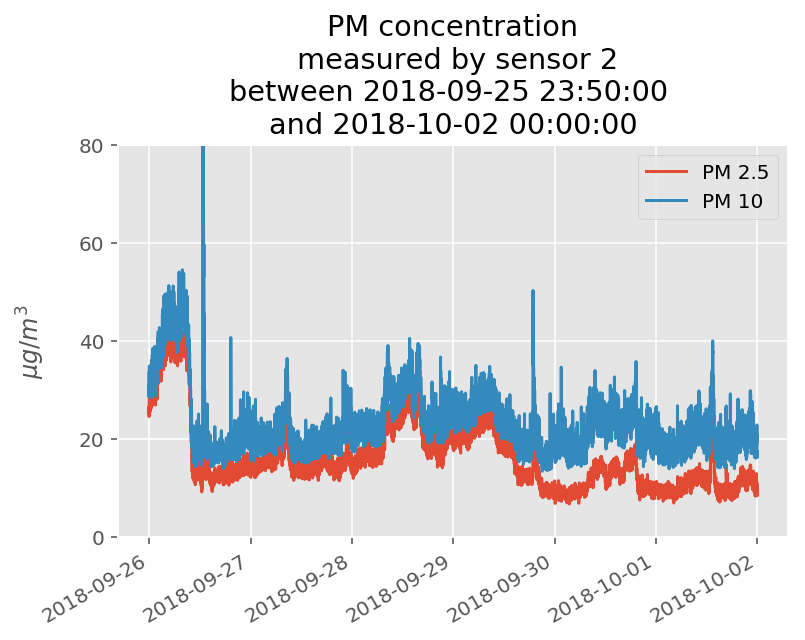

In [54]:
# plot signal SENSOR-1-SDS021
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

fmt = "%Y-%m-%d %H:%M:%S"
fig, ax = plt.subplots()
ax.plot(times_1, data_1[:,0])
ax.plot(times_1,data_1[:,1])
ax.set_ylim(0,80)
ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
ax.legend(('PM 2.5','PM 10'),loc='upper right')
plt.title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
plt.ylabel(r'$\mu g/m^3$',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 20
plt.show();

In [55]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

# SENSOR-2-PMS5003

In [56]:
sensor_no = 2
output_no = 12
times_2, data_2 = da.getSignalData(dataPath, sensor_no,start_date, end_date, duration, output_no)

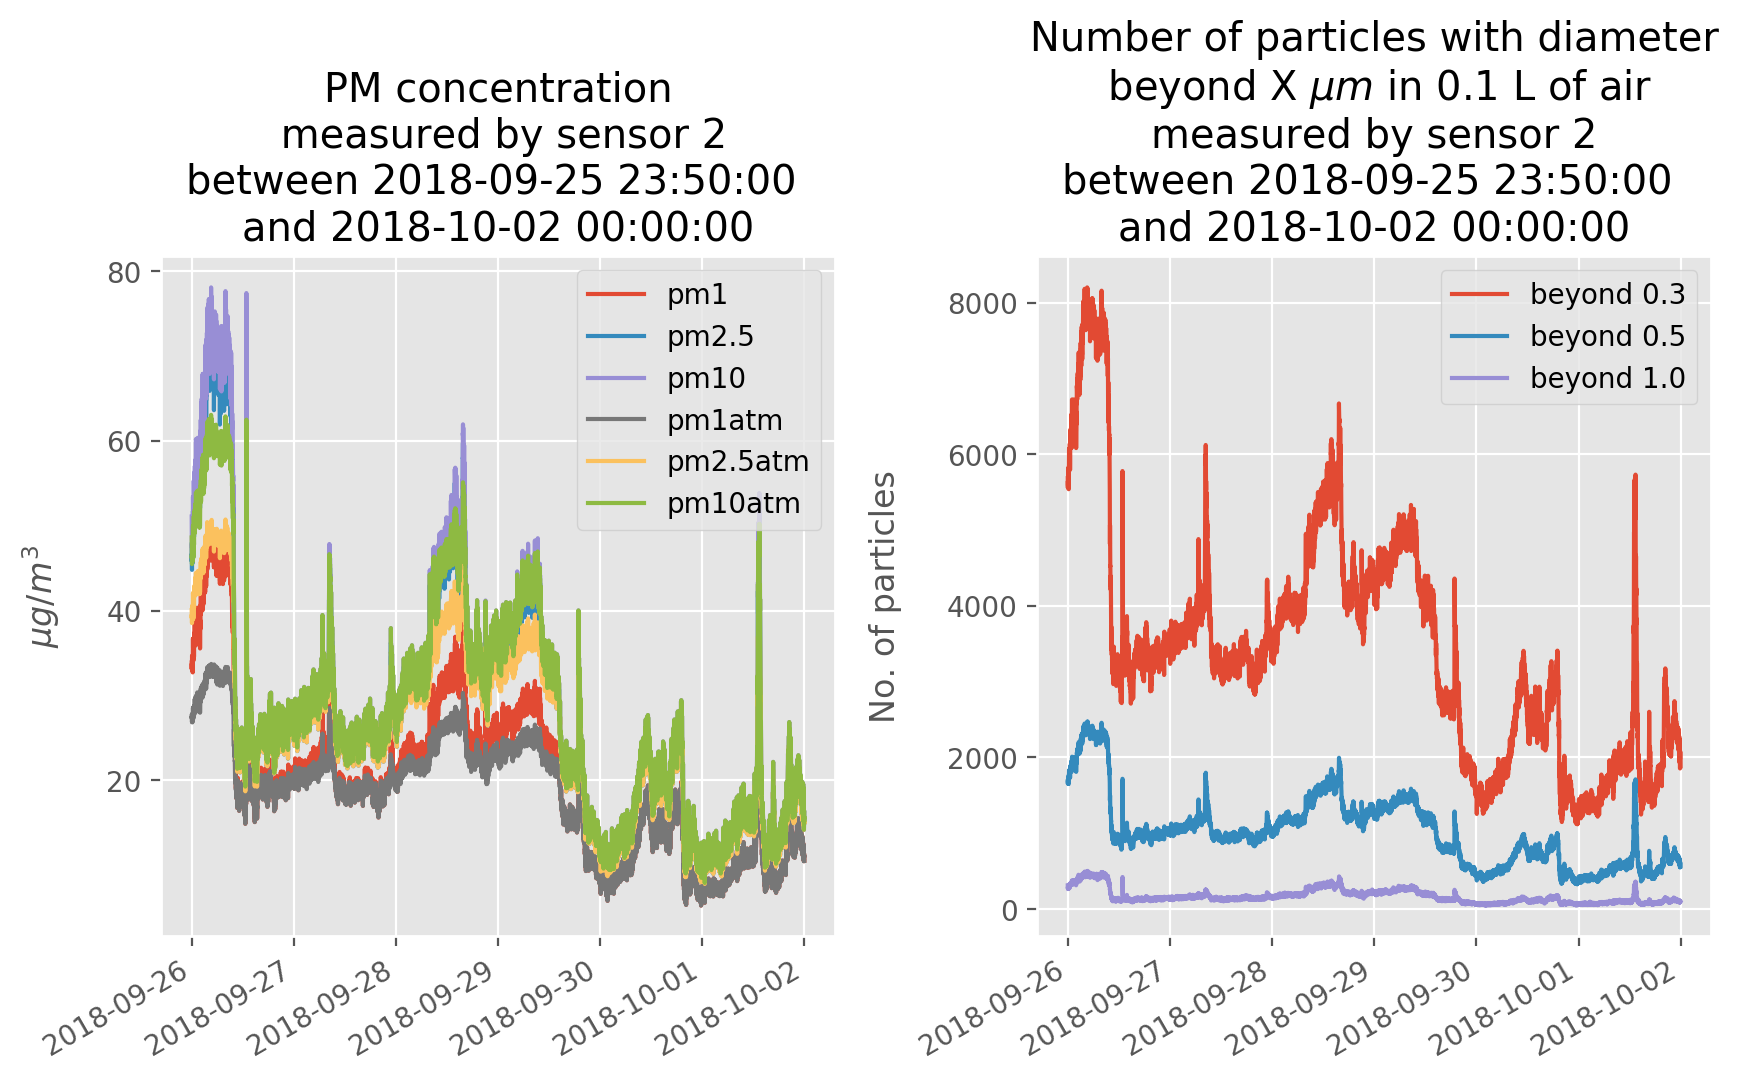

In [58]:
# plot signal SENSOR-2-PMS5003
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

fmt = "%Y-%m-%d %H:%M:%S"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(hspace=0.1, wspace=0.3)

# plot PM
for i in range(6):
    ax[0].plot(times_2, data_2[:,i])
ax[0].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# plot concentration
ax[0].legend(('pm1', 'pm2.5', 'pm10', 'pm1atm', 'pm2.5atm', 'pm10atm'),loc='upper right')
# plt.title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' and '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[0].set_title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' \nand '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[0].set_ylabel(r'$\mu g/m^3$',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax[0].xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

# plot No. of particles
for i in range(3):
    ax[1].plot(times_2, data_2[:,6+i])
ax[1].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# plot concentration
ax[1].legend(('beyond 0.3', 'beyond 0.5', 'beyond 1.0'),loc='upper right')
# plt.title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' and '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[1].set_title('Number of particles with diameter\n beyond X '+ r'$\mu m$ ' + 'in 0.1 L of air\n' + 'measured by sensor ' +str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' \nand '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[1].set_ylabel('No. of particles',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax[1].xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()


plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.show();

In [9]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

# Comparing signal between both sensors

## Plot signals in time - PM 2.5 and PM 10

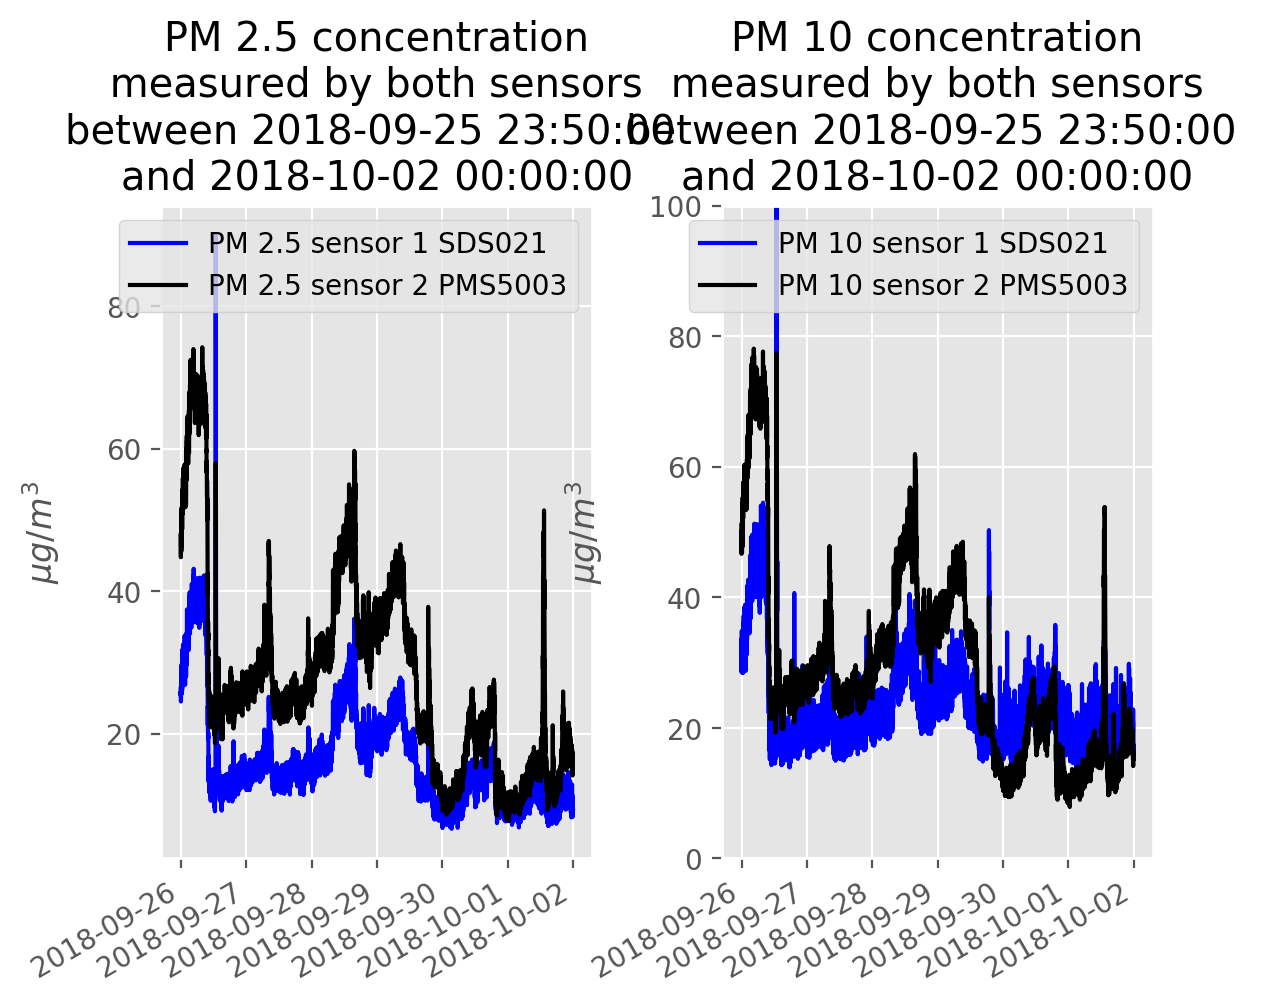

In [10]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(hspace=0.1, wspace=0.3)

# PM 2.5
ax[0].plot(times_1, data_1[:,0],'b')
ax[0].plot(times_2,data_2[:,1],'k')
ax[0].legend(('PM 2.5 sensor 1 SDS021','PM 2.5 sensor 2 PMS5003'),loc='upper right')
ax[0].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# Tell matplotlib to interpret the x-axis values as dates
ax[0].xaxis_date()
ax[0].set_title('PM 2.5 concentration\n measured by both sensors '+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[0].set_ylabel(r'$\mu g/m^3$',labelpad=16)

# PM 10
ax[1].plot(times_1, data_1[:,1],'b')
ax[1].plot(times_2,data_2[:,2],'k')
ax[1].legend(('PM 10 sensor 1 SDS021','PM 10 sensor 2 PMS5003'),loc='upper right')
ax[1].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# Tell matplotlib to interpret the x-axis values as dates
ax[1].xaxis_date()
ax[1].set_title('PM 10 concentration\n measured by both sensors '+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[1].set_ylabel(r'$\mu g/m^3$',labelpad=16)
ax[1].set_ylim([0,100]) # cut the y to see better

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.show();

In [11]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

## Correlation between signals - PM 2.5 and PM 10

### (1) Scatter plot of signal-Vs.-signal 

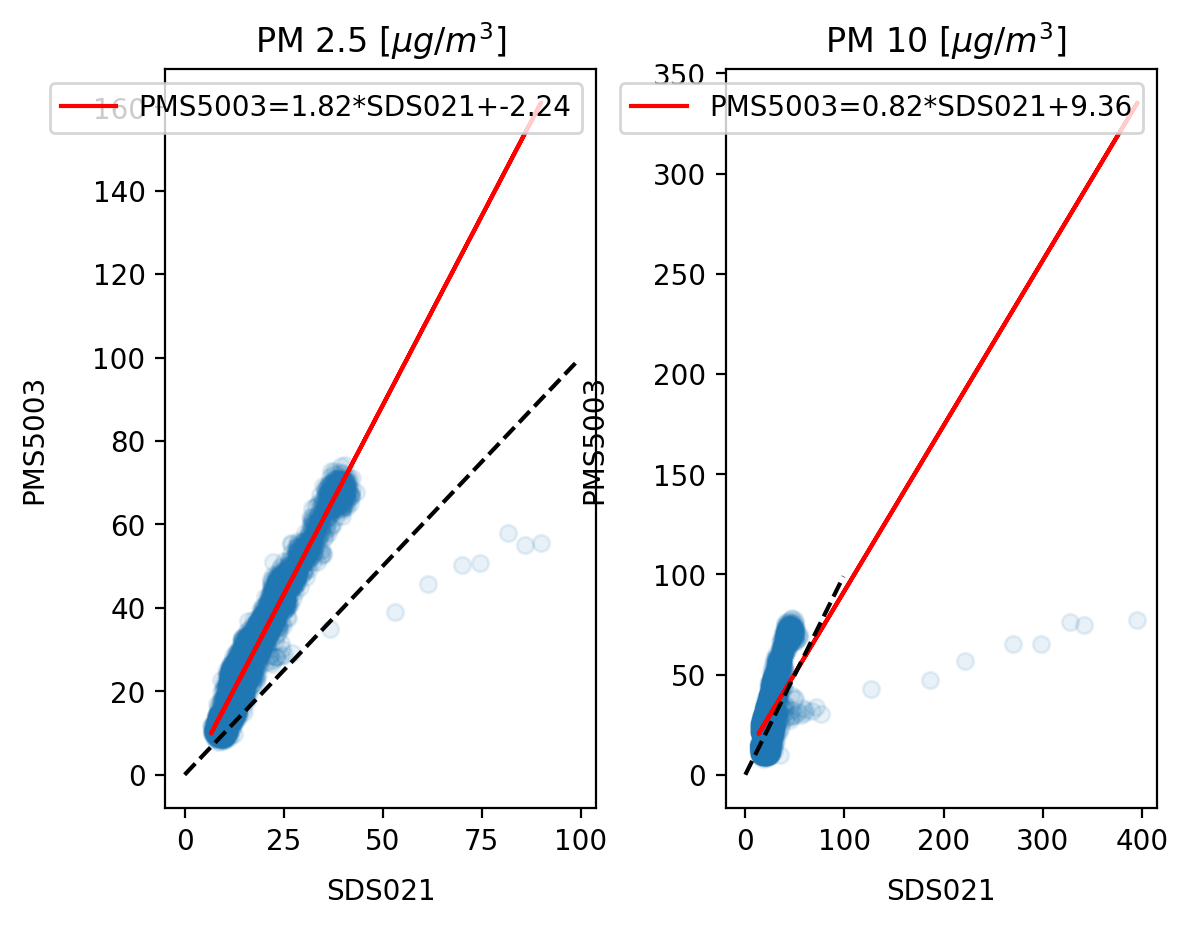

In [12]:
# scatter plot of signal Vs. signal 
from scipy import stats
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')

t = ['PM 2.5 ' + r'$[\mu g/m^3]$',' PM 10 ' + r'$[\mu g/m^3]$']

fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.3)
for i in range(1, 3):
    ax = fig.add_subplot(1, 2, i)
    plt.scatter(data_1[:,i-1], data_2[:,i], alpha=0.1)
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.title(t[i-1])
    plt.ylabel('PMS5003',labelpad=16)
    plt.xlabel('SDS021',labelpad=8)
#     plt.ylim([0,100]) #set y lim to see better
#     plt.xlim([0,100]) #set x lim to see better
    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_1[:,i-1],data_2[:,i])
    line = slope*data_1[:,i-1]+intercept
    plt.plot(data_1[:,i-1],line,'r',label='PMS5003={:.2f}*SDS021+{:.2f}'.format(slope,intercept))
    plt.legend(fontsize=10)
    # plot a reference
    plt.plot(np.arange(0,100),np.arange(0,100),'--k')    

plt.show();


It looks like the PMS5003 is overestimating compared to SDS021 (or SDS021 is underestimating). This is seen mainly in PM 2.5, while in PM 10 I would guess the exreme values of SDS021 are strongly influencing the fit. I'm not sure weather the high values from SDS021 mean it is more sensitive than PMS5003 and it might be better for us, or it means it has noise.

In [13]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

### (2) Residuals - substruct two signals and plot in time - sensor SDS021 MINUS sensor PMS5003 

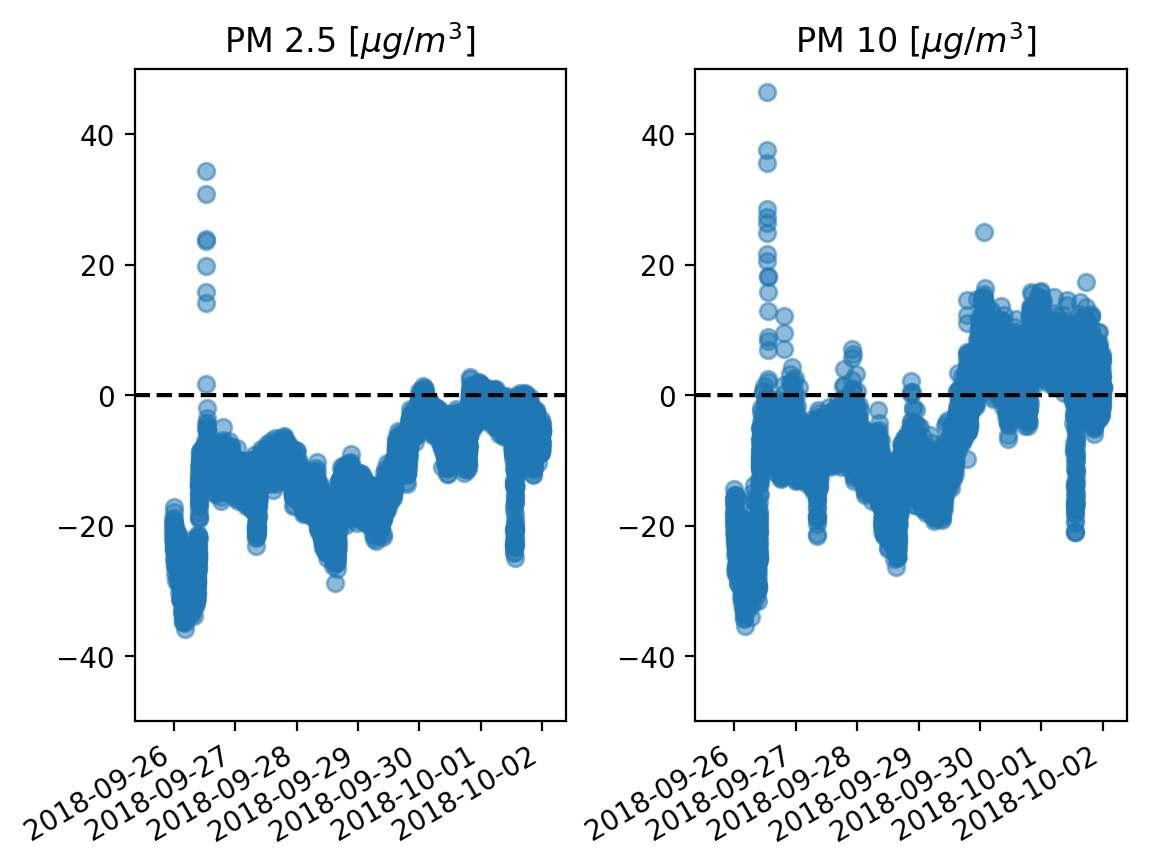

In [14]:
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')

t = ['PM 2.5 ' + r'$[\mu g/m^3]$',' PM 10 ' + r'$[\mu g/m^3]$']
# get times for residuals
s = datetime.datetime(2018, 9, 26, 0, 0, 0)-datetime.timedelta(days = 1)
e = datetime.datetime(2018, 10, 2, 0, 0, 0)+datetime.timedelta(days = 1)
sensor_no = 1
output_no = 2
t_res, _ = da.getSignalData(dataPath, sensor_no,s, e, duration, output_no)

fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.3)
for i in range(1, 3):
    ax = fig.add_subplot(1, 2, i)
    plt.scatter(times_1,data_1[:,i-1]-data_2[:,i], alpha=0.5)
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.title(t[i-1])
    fig.autofmt_xdate()
    ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
    plt.xlim([t_res[0],t_res[-1]])
    plt.ylim([-50,50])
    plt.plot(t_res,np.zeros((len(t_res))),'--k')         
plt.show();


Here again it is clear that most of the time platower PMS5003 is over-estimating (alternatively Nova Fitness SDS021 is under-estimating). At the last two days of measurements, the trend seems to switch for the PM 10 values. 

In [15]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

In [16]:
# mean absolute deviations

### Cross-correlation between signals 

In [17]:
t = ['PM 2.5','PM 10']

# the equivalence of np.corrcoef(data_1[:,i-1], data_2[:,i])
# normalized cross-correlation 
def pearson(a, b):
    # Length.
    n = len(a)
    # Means.
    ma = sum(a) / n
    mb = sum(b) / n
    # Shifted samples.
    _ama = a - ma
    _bmb = b - mb
    # Standard deviations.
    sa = np.sqrt(np.dot(_ama, _ama) / n)
    sb = np.sqrt(np.dot(_bmb, _bmb) / n)
    # Covariation.
    cov = np.dot(_ama, _bmb) / n
    # Final formula.
    # Note: division by `n` in deviations and covariation cancel out each other in
    #       final formula and could be ignored.
    return cov / (sa * sb)

# the equivalence of plt.xcorr(data_1[:,i-1], data_2[:,i],normed=True, maxlags=1) #maxlags=1 is zero lag
# not normalized cross-correlation
def cross0lag(a, b):
    return np.dot(a, b) / np.sqrt(np.dot(a, a) * np.dot(b, b))

for i in range(1, 3):
    pearson_coeff = pearson(data_1[:,i-1], data_2[:,i])
    cross_coeff = cross0lag(data_1[:,i-1], data_2[:,i])
    print('Manually calculated coefficients for ' + t[i-1]+":")
    print(t[i-1] +' Pearson =', pearson_coeff)
    print(t[i-1] +' Cross =', cross_coeff, "\n")
    

Manually calculated coefficients for PM 2.5:
PM 2.5 Pearson = 0.9578479382206851
PM 2.5 Cross = 0.991065081433912 

Manually calculated coefficients for PM 10:
PM 10 Pearson = 0.5927918988909372
PM 10 Cross = 0.9238460875063983 



In [18]:
# compare cross-correlation (Pearson) for different averaging intervals
# get average signals


# My mac address exposure

## from sensor-1

In [19]:
myMacAdd = 'AC:5F:3E:69:0D:7A'
sensor_no = 1
output_no = 2
seq1 = da.getSignalPerMacAddress(dataPath,sensor_no,start_date,end_date,myMacAdd,output_no,duration)

## from sensor-2

In [20]:
sensor_no = 2
output_no = 12
seq2 = da.getSignalPerMacAddress(dataPath,sensor_no,start_date,end_date,myMacAdd,output_no,duration)

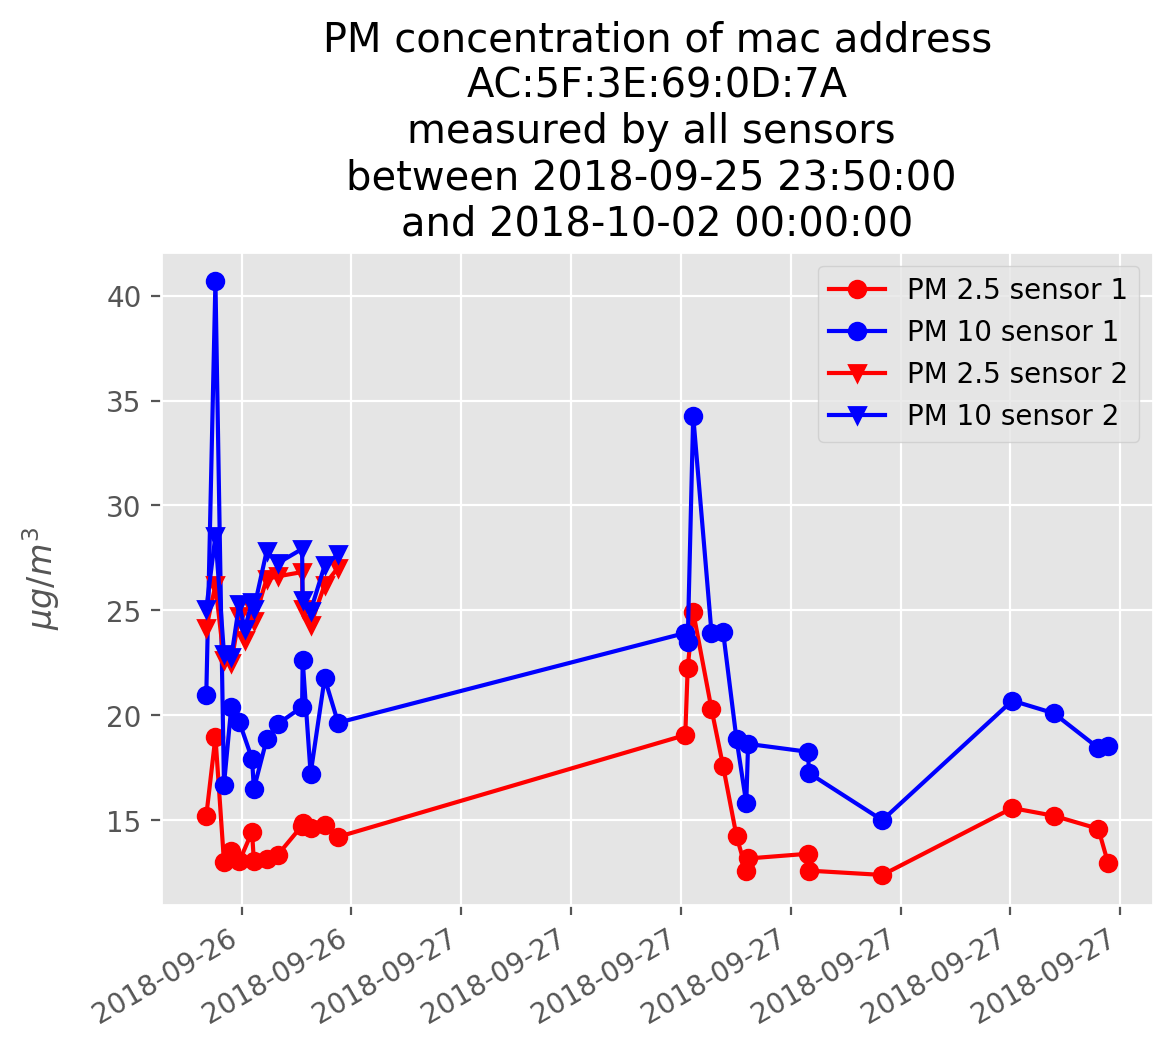

In [21]:
# plot PM2.5 and PM10 from "all" sensors on the same plot 
# plot signal SENSOR-2-PMS5003
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

fmt = "%Y-%m-%d %H:%M:%S"
fig, ax = plt.subplots()

colors = ['r','b']
markers = ['o','v']
# plot PM seq-1
ax.plot(seq1[:,0], seq1[:,3],marker = markers[0],color = colors[0], label='PM 2.5 sensor 1')
ax.plot(seq1[:,0], seq1[:,4],marker = markers[0],color = colors[1], label='PM 10 sensor 1')

# plot PM seq-2
ax.plot(seq2[:,0], seq2[:,4],marker = markers[1],color = colors[0], label='PM 2.5 sensor 2')
ax.plot(seq2[:,0], seq2[:,5],marker = markers[1],color = colors[1], label='PM 10 sensor 2')

# ax.set_xlim('2018-09-26 16:00:00','2018-09-27 23:00:00')

ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))

ax.legend(loc='upper right')

plt.title('PM concentration of mac address\n' + myMacAdd + '\nmeasured by all sensors '+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
plt.ylabel(r'$\mu g/m^3$',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()


plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.show();

In [22]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

# Particle distributions

## Number of particles 

In [23]:
import pandas as pd
# %config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot');

# no03, no05, no1, no25, no5, no10
# data represents number of particles between 0.3-0.5, 0.5-1, 1-2.5,2.5-5,5-10 micrometer. 
particles = data_2[:,6:11] - data_2[:,7:12] 
bins = ['0.3-0.5 '+r'$\mu m$','0.5-1.0 '+r'$\mu m$', '1.0-2.5 '+r'$\mu m$', '2.5-5.0 '+r'$\mu m$', '5.0-10.0 '+r'$\mu m$']
x = np.arange(5)
y=np.mean(particles,axis=0)

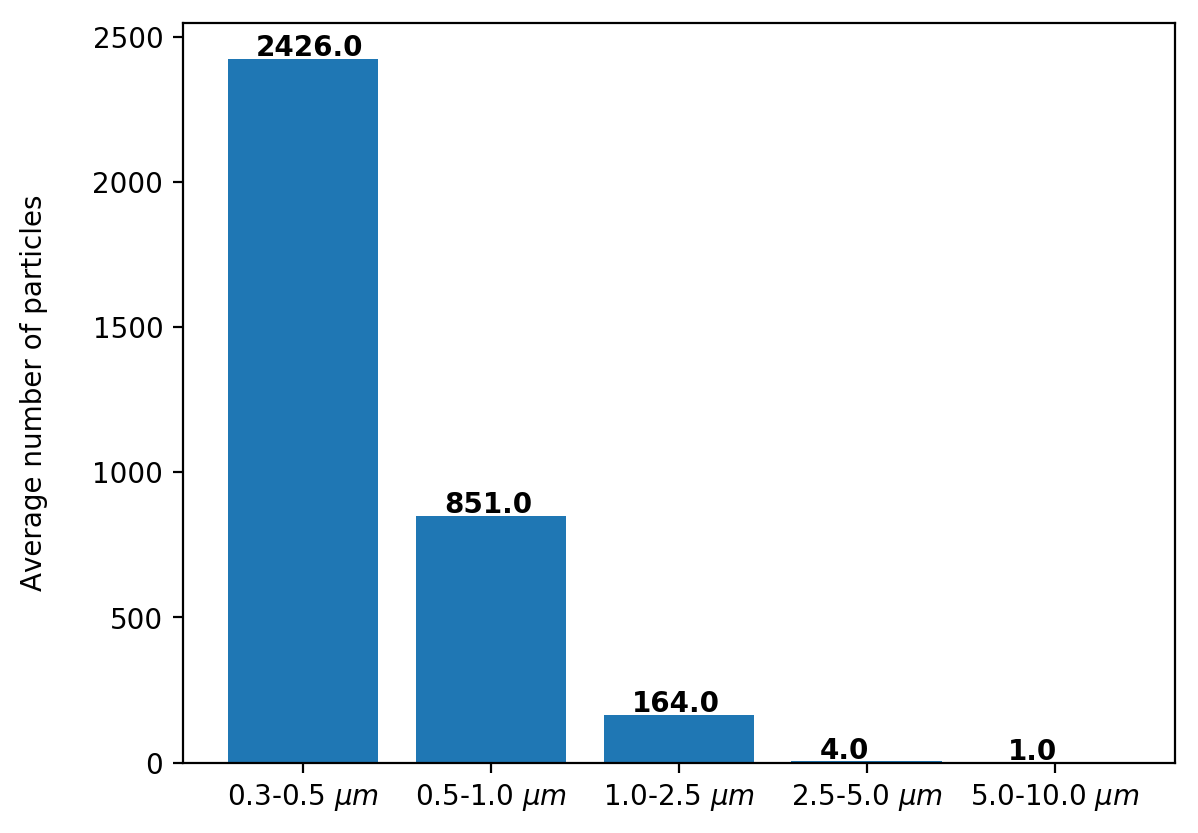

In [24]:
# make a bar plot of the mean number of particles in each category
fig, ax = plt.subplots()

plt.bar(x,y)
ax.set_xticks(np.arange(len(bins)))
ax.set_xticklabels(bins)
plt.ylabel('Average number of particles',labelpad=16)
y_int = np.round(y)

for i, v in enumerate(y_int):
    ax.text(i-0.25, v+10, str(y_int[i]), color='k',fontweight='bold')
plt.show();

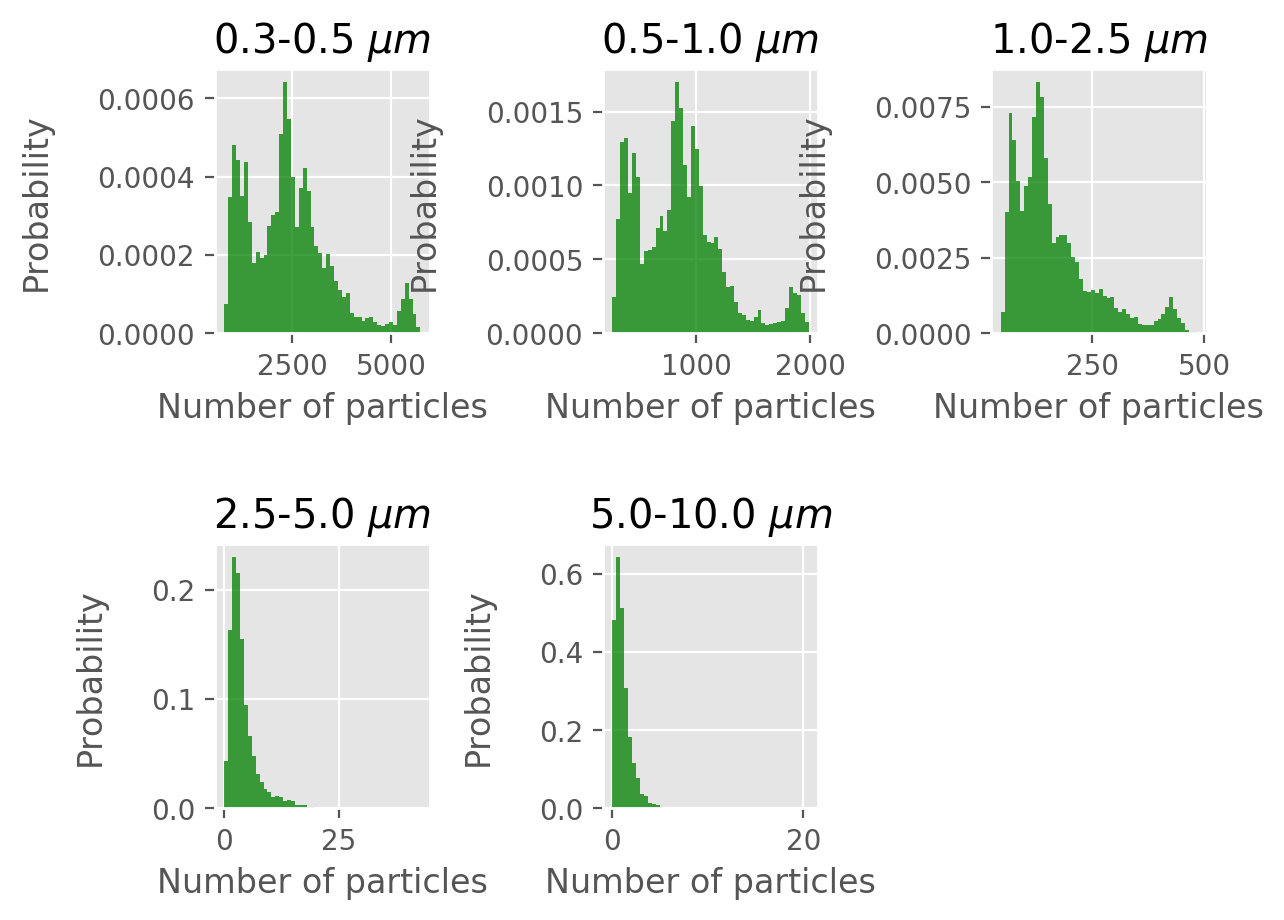

In [25]:
# make a hist plot for each bin size, showing the probability of number of particles. 
# This indicates my patterns of exposure during the time of measurement. 

%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i in range(1, 6):
    ax = fig.add_subplot(2, 3, i)
    plt.hist(particles[:,i-1], 50, density=True, facecolor='g', alpha=0.75)
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.title(bins[i-1])
    plt.ylabel('Probability',labelpad=16)
    plt.xlabel('Number of particles')

plt.show();

## PM concentration

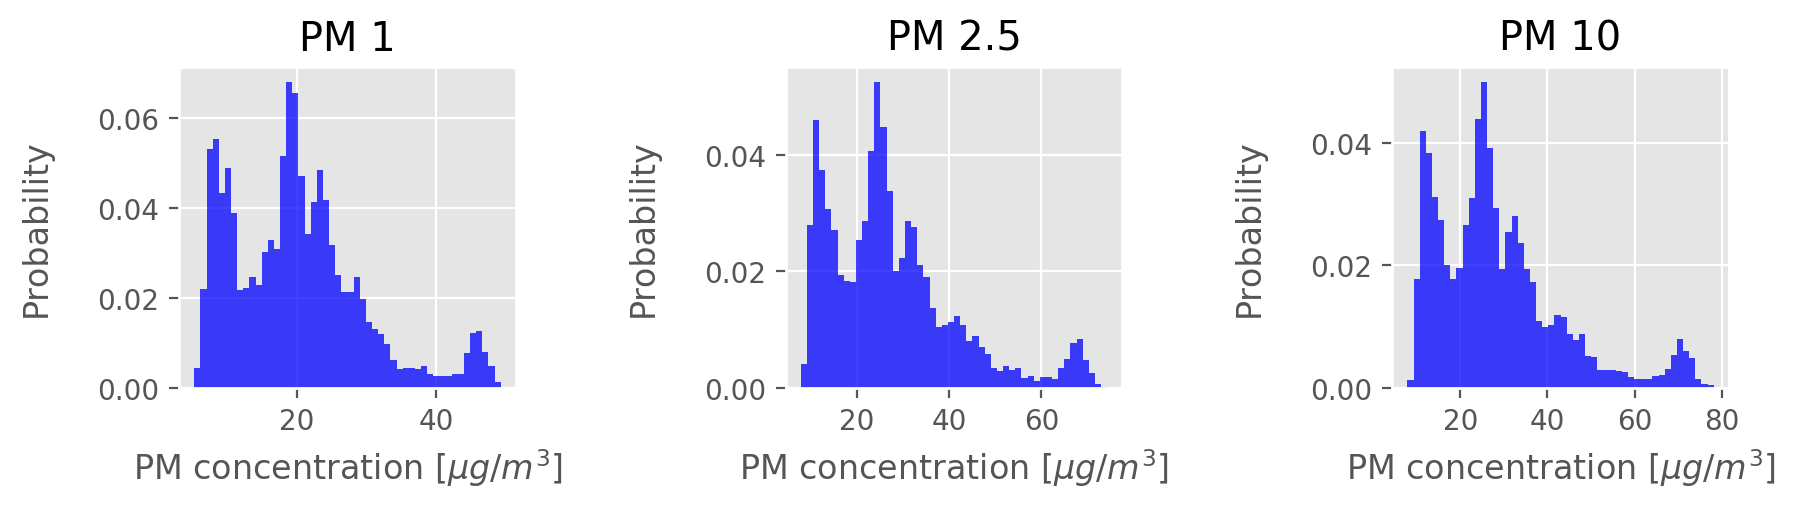

In [26]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

t = ['PM 1','PM 2.5', 'PM 10']

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.8)
for i in range(1, 4):
    ax = fig.add_subplot(2, 3, i)
    plt.hist(data_2[:,i-1], 50, density=True, facecolor='b', alpha=0.75)
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.title(t[i-1])
    plt.ylabel('Probability',labelpad=16)
    plt.xlabel('PM concentration '+r'$[\mu g/m^3]$')

plt.show();

# Zoey's measurements  - Calibration 

Compare measured data from Atzmaut station and SDS021 + PMS5003 + Met-one-804 sensors placed between 7.6 08:00 and 16.6 07:00

# to do: 
*re-download station data to the correct dates + download temp. and humidity <br>
*read MET-ONE data.<br>
*read sensors data and compare all of them: <br>
@ compare number of particles MET-ONE-PMS5003 - basic lines in time <br>
*convert MET-ONE number of particles to mass: <br>
@ compare mass of all three sensors and station data - basic lines in time <br>

**advanced** <br>
*compare each sensor using scatter and residuals comparison.  <br>
*look for daily patterns in each sensor<br>
*look for weekly patterns (saturday no pollution)<br>
*look for patterns with temprature and humidity<br>
*scatter_matrix for all variables?




## Atzmaus data - 07/06 18:00 - 16/06 18:00 - PM-2.5 and PM-1

Load AQS data

In [27]:
import pandas as pd

# I first open it in excel online and fix the first rows 
df = pd.read_excel('ZoeysData/StationDataAtzmaut.xlsx')

clean

In [28]:
# remove weird data at the end
df.drop(df.iloc[-8:,:].index, inplace=True)

In [29]:
df.head()
df.tail()

,PM1,PM2.5,date
0,25,31.3,07/06/2018 08:00
1,22,31.8,07/06/2018 08:05
2,20,28.5,07/06/2018 08:10
3,18,23.9,07/06/2018 08:15
4,19,20.4,07/06/2018 08:20


,PM1,PM2.5,date
2768,11,23.6,16/06/2018 22:40
2769,11,22.4,16/06/2018 22:45
2770,9,23.2,16/06/2018 22:50
2771,10,25,16/06/2018 22:55
2772,12,26.9,16/06/2018 23:00


In [30]:
# df['date'].apply(type).head()

In [31]:
# change the date to a normal format based on df.loc[0,'date'] and df.loc[len(df)-1,'date']. notice the days and months of my dates are reversed compared to the standard
df.date = pd.date_range(start='06/07/2018 08:00',end='06/16/2018 23:00',freq='5min')

In [32]:
# reset index
df.reset_index(drop=True, inplace=True)

In [33]:
# now take rows between 7.6.2018 18:00 and 16.6.2018 18:00
mask = (df.date < "2018-06-07 18:00") | (df.date > "2018-06-16 18:00")
df.drop(df.loc[mask,:].index, inplace=True)

In [34]:
# reset index 
df.reset_index(drop=True, inplace=True)

In [35]:
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
df['PM1'] = pd.to_numeric(df['PM1'], errors='coerce')
# change negative values to NaN
df['PM2.5'] = np.where(df['PM2.5'] < 0, np.NaN , df['PM2.5'])
df['PM1'] = np.where(df['PM1'] < 0, np.NaN , df['PM1'])

In [36]:
df.rename(index=str, columns={"PM1": "PM1_AQM", "PM2.5": "PM2.5_AQM"},inplace=True)

In [37]:
df.head()
df.tail()

,PM1_AQM,PM2.5_AQM,date
0,23.0,22.0,2018-06-07 18:00:00
1,20.0,23.1,2018-06-07 18:05:00
2,21.0,22.5,2018-06-07 18:10:00
3,22.0,23.3,2018-06-07 18:15:00
4,22.0,25.1,2018-06-07 18:20:00


,PM1_AQM,PM2.5_AQM,date
2588,18.0,30.7,2018-06-16 17:40:00
2589,14.0,30.8,2018-06-16 17:45:00
2590,11.0,27.8,2018-06-16 17:50:00
2591,6.0,24.2,2018-06-16 17:55:00
2592,6.0,21.6,2018-06-16 18:00:00


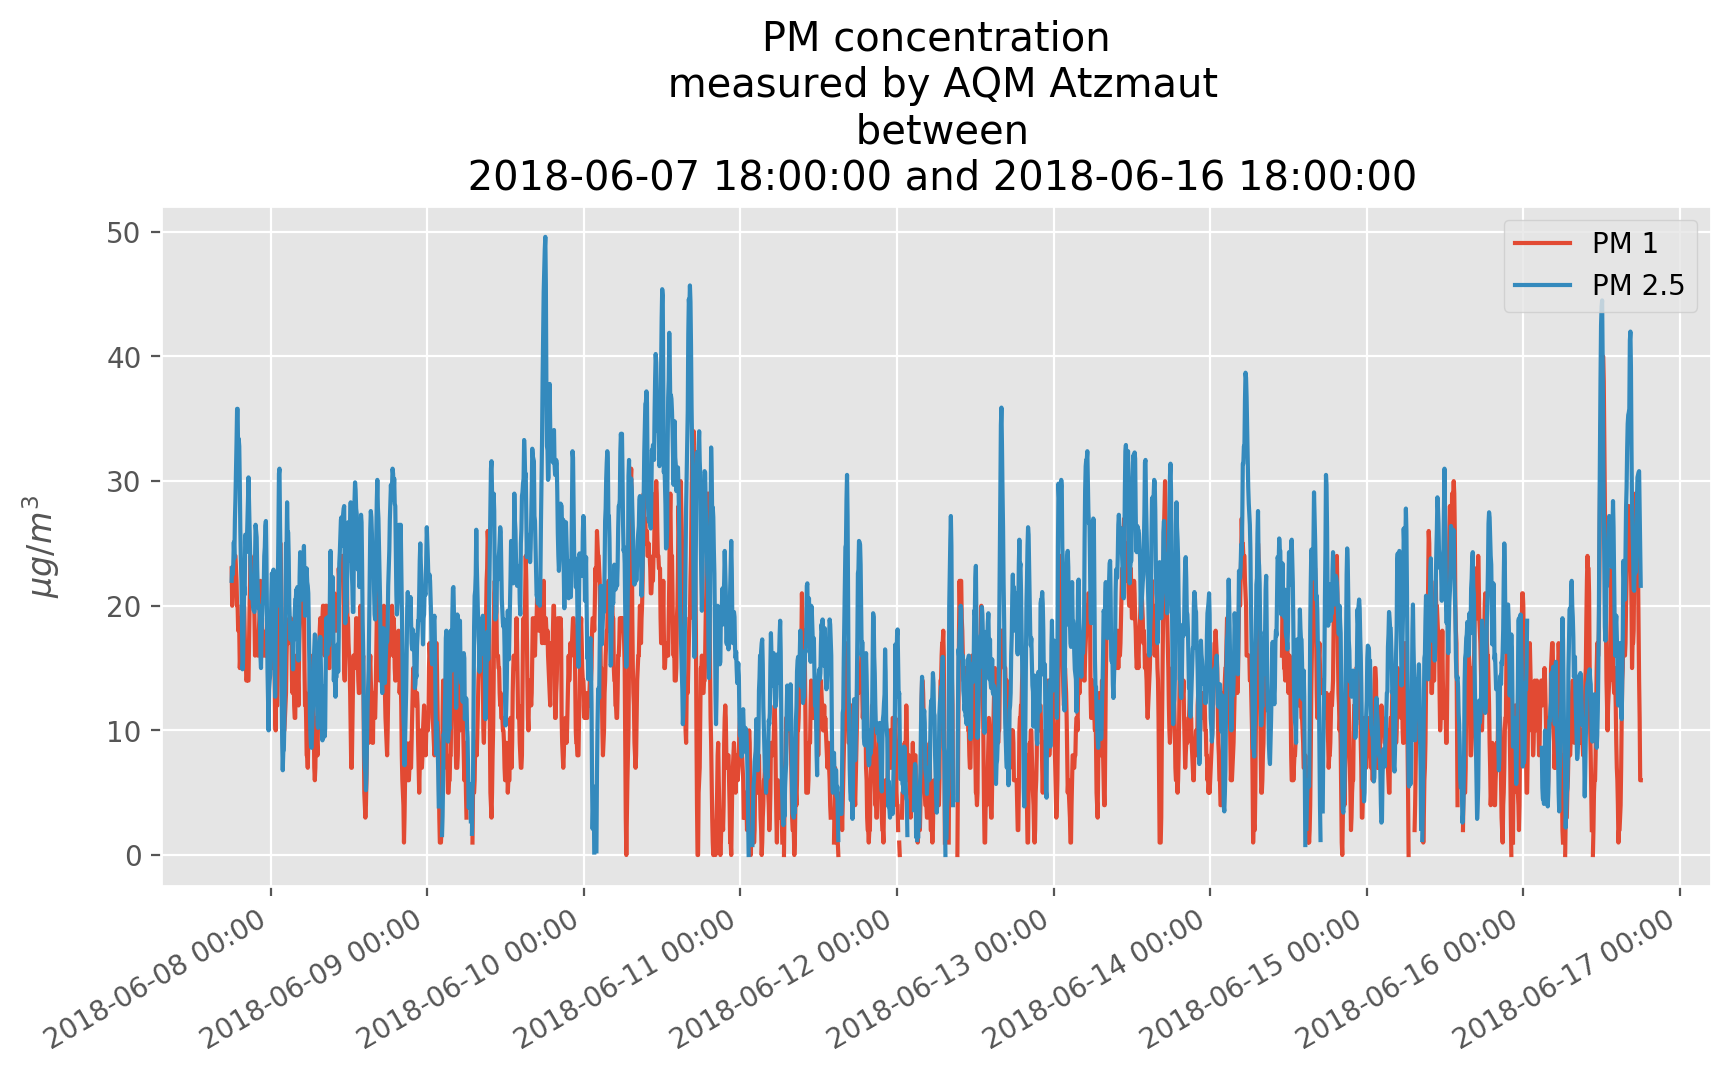

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

%config InlineBackend.figure_format = 'retina'
# %matplotlib inline

fmt = "%Y-%m-%d %H:%M:%S"
fig, ax = plt.subplots()

ax.plot(df['date'], df['PM1_AQM'])
ax.plot(df['date'], df['PM2.5_AQM'])
ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d %H:%M"))
ax.legend(('PM 1', 'PM 2.5'),loc='upper right')
plt.title('PM concentration\n measured by AQM Atzmaut\n between\n ' + df['date'][0].strftime(fmt) + ' and '+ df['date'][-1].strftime(fmt))
ax.set_ylabel(r'$\mu g/m^3$',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis_date()

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 16
plt.show();

In [39]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

## MET-ONE data (number of particles in 1L)

In [40]:
df_met1_1 = pd.read_table('ZoeysData/Ohad/180607_114739_term.txt')
df_met1_2 = pd.read_table('ZoeysData/Ohad/180608_120806_term.txt')
df_met1_3 = pd.read_table('ZoeysData/Ohad/180609_123820_term.txt')
df_met1_4 = pd.read_table('ZoeysData/Ohad/180610_105424_term.txt')
df_met1_5 = pd.read_table('ZoeysData/Ohad/180611_111348_term.txt')
df_met1_6 = pd.read_table('ZoeysData/Ohad/180612_120120_term.txt')
df_met1_7 = pd.read_table('ZoeysData/Ohad/180613_110102_term.txt')
df_met1_8 = pd.read_table('ZoeysData/Ohad/180614_113002_term.txt')
df_met1_9 = pd.read_table('ZoeysData/Ohad/180615_104835_term.txt')
df_met1_10 = pd.read_table('ZoeysData/Ohad/180616_124531_term.txt')

In [41]:
# remove the first lines
for i in range(1,11):
    var = 'df_met1_{}'.format(i)
    eval(var).drop(eval(var).iloc[0:13,:].index, inplace=True)
    # split by ','
    eval(var)['Time'], eval(var)['Loc'],eval(var)['Period'],eval(var)['Size1'],eval(var)['Count1'],eval(var)['Size2'],eval(var)['Count2'],eval(var)['Size3'],eval(var)['Count3'], eval(var)['Size4'],eval(var)['Count4'],eval(var)['Units'],eval(var)['Status'] = eval(var).iloc[:,0].str.split(',',12).str
    # reset index
    eval(var).reset_index(drop=True, inplace=True)
    # convert to datetime
    eval(var).Time = pd.to_datetime(eval(var).Time)


In [42]:
# remove the first column
for i in [1,2,4,5,6,7,8,9,10]:
    var = 'df_met1_{}'.format(i)
    eval(var).drop(['1'],axis=1, inplace=True)
    
df_met1_3.drop(['10'],axis=1, inplace=True)

In [43]:
df_met1_1.tail()

,Time,Loc,Period,Size1,Count1,Size2,Count2,Size3,Count3,Size4,Count4,Units,Status
2690,2018-06-07 11:42:34,002,60,0.3,108144,0.5,7824,1.0,2711,2.5,662,/L,"000,*3639"
2691,2018-06-07 11:43:34,002,60,0.3,107516,0.5,8050,1.0,2928,2.5,749,/L,"000,*3650"
2692,2018-06-07 11:44:34,002,60,0.3,108805,0.5,7896,1.0,2687,2.5,650,/L,"000,*3663"
2693,2018-06-07 11:45:34,002,60,0.3,108593,0.5,8070,1.0,2815,2.5,684,/L,"000,*3653"
2694,2018-06-07 11:46:34,002,60,0.3,109241,0.5,8281,1.0,2928,2.5,725,/L,"000,*3650"


In [44]:
# join all dfs and remove doubles

In [45]:
df_metOne = pd.concat([df_met1_1,df_met1_2,df_met1_3,df_met1_4,df_met1_5,df_met1_6,df_met1_7,df_met1_8,df_met1_9,df_met1_10],
          axis=0, join='inner', join_axes=None, ignore_index=True,
          keys=None, levels=None, names=None, verify_integrity=True,
          copy=True)

In [46]:
# find duplicates 
a = df_metOne.duplicated(subset='Time', keep='first')
ind = np.transpose(np.where(a==True))
np.shape(ind)
ind2 = np.squeeze(ind)
np.shape(ind2)
df_metOne.drop(df_metOne.iloc[ind2,:].index, inplace=True)
df_metOne.reset_index(drop=True, inplace=True)

(11280, 1)

(11280,)

In [47]:
# convert the strings to int/float
df_metOne['Count1'] = pd.to_numeric(df_metOne['Count1'], errors='coerce')

<IPython.core.display.Javascript object>


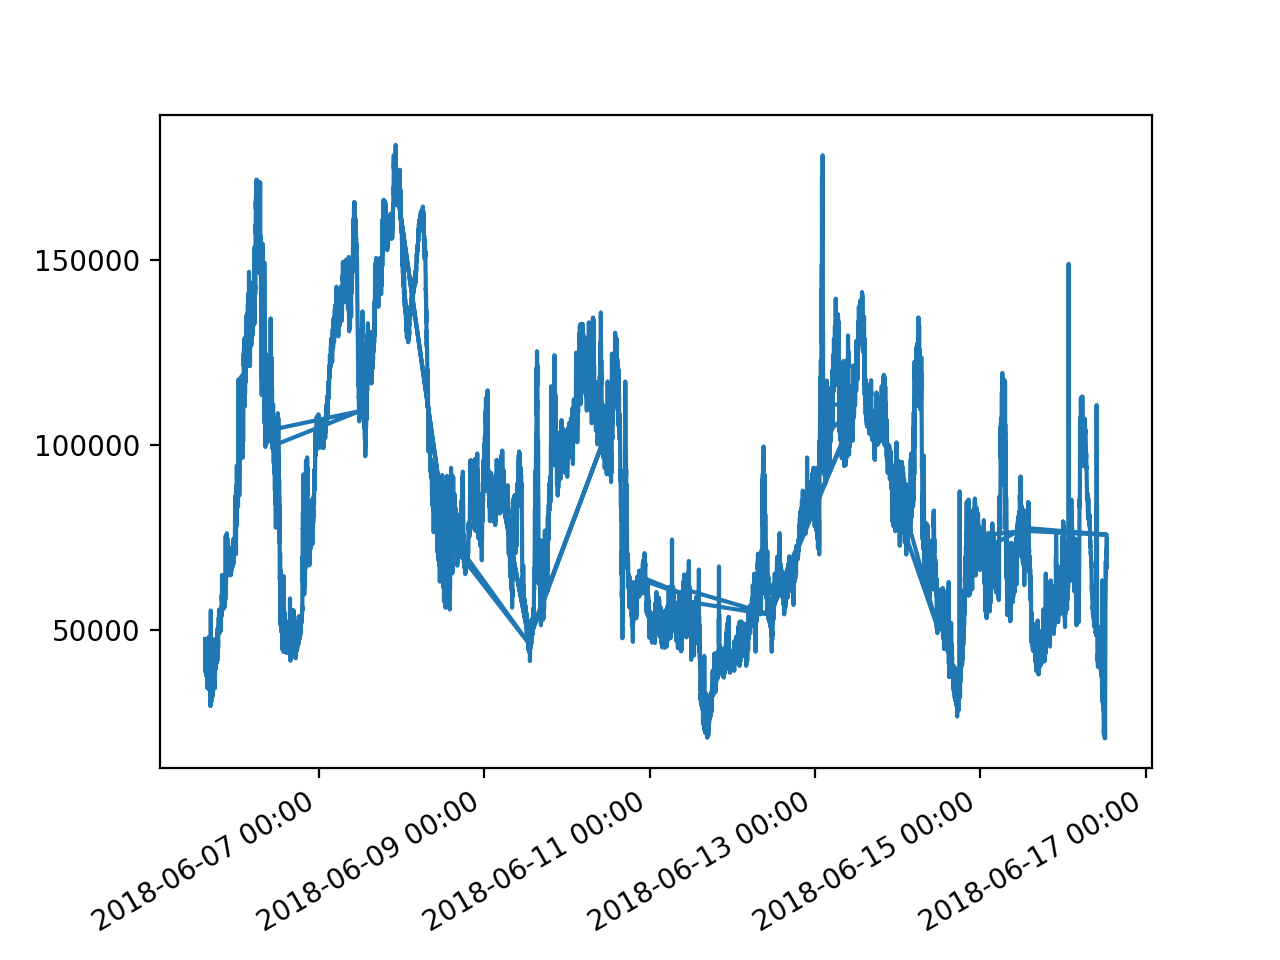

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(df_metOne['Time'], df_metOne['Count1'])
# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d %H:%M"))
ax.xaxis_date()

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 16
plt.show();

In [49]:
# see the time diffs between measurements, remove the ones that is not 1 minute diff






In [50]:
# average per 5 minutes





In [51]:
# concat data to df




## Sensors data

# Our cool experiment - putting the sensors in a fume hood

In [ ]:


# from IPython.display import Math
# Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Math(r'V\cdot \frac{dc(t)}{dt} = q\cdot A_{1} - u\cdot A_{2}\cdot c(t)')
# Math(r'given\hspace{0.5cm} q\cdot A_{1} = E\hspace{0.5cm}')
# Math(r'mark\hspace{0.5cm} \alpha = u\cdot A_{2}')
# \newline
# c(t) = const\cdot e^{\frac{-\alpha \cdot t}{V}}+\frac{E}{\alpha}
# \newline
# \int \frac{V\cdot{dc(t)}}{E-\alpha\cdot c(t)}dc = \int dt
# \newline
# \frac{-V}{\alpha}\cdot\ln (E-\alpha\cdot c(t)) +C_1 = t + C_2 
# \newline
# \newline
# c(t) = C^*\cdot\exp (\frac{\alpha\cdot t}{V})+\frac{E}{\alpha}

 

<div style="text-align: right"> מה שאני אומרת זה שאפשר לכתוב טקסט יפה כאן אבל ה קורה אם השורה עשית ארוכה מידי וגם הולכות לי אותיות וזה מש ממש לא כיף יש עוד לא לכתוב ה אי אכתוב הלכה הנ קודם הלכה המ אחר כך הלכה הב וה ישאר בסופ אולי לא ישארו אותיות ולא אוכל לכתוב יותר זה יהיה באסנורא  </div>

